<a href="https://colab.research.google.com/github/Ur1Maid/ml_labs/blob/main/sem_1_dz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Федоров Никита РИС-22-3 nofedorov@edu.hse.com


In [31]:
#импортирование пакетов
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

pip install plotly

In [60]:
#импортирование CSV
df = pd.read_csv('/content/sample_data/prices-split-adjusted.csv', sep=',')
df = df.loc[df['symbol'] == 'ZION']
df = df.reset_index(drop=True)
df


,date,symbol,open,close,low,high,volume
0,2010-01-04,ZION,12.940000,13.330000,12.880000,13.370000,3974600.0
1,2010-01-05,ZION,13.280000,13.800000,13.230000,13.830000,5605500.0
2,2010-01-06,ZION,13.670000,15.000000,13.660000,15.010000,12615200.0
3,2010-01-07,ZION,14.970000,16.680000,14.950000,17.000000,24716800.0
4,2010-01-08,ZION,16.190001,16.410000,15.520000,16.660000,6903000.0
...,...,...,...,...,...,...,...
1757,2016-12-23,ZION,43.779999,43.860001,43.590000,43.939999,1243400.0
1758,2016-12-27,ZION,44.099998,43.930000,43.669998,44.150002,1096300.0
1759,2016-12-28,ZION,44.029999,43.279999,43.180000,44.029999,1055200.0
1760,2016-12-29,ZION,43.270000,42.790001,42.630001,43.639999,1551600.0


In [61]:
print(df.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [63]:
#обращение к конкретной колонке данных
print(df.open)
df['open'][100]
#обращение к конкретной ячейке данных
print("Колонка open, строка 50 - " ,df.open[50])

0       12.940000
1       13.280000
2       13.670000
3       14.970000
4       16.190001
          ...    
1757    43.779999
1758    44.099998
1759    44.029999
1760    43.270000
1761    43.070000
Name: open, Length: 1762, dtype: float64
Колонка open, строка 50 -  22.18


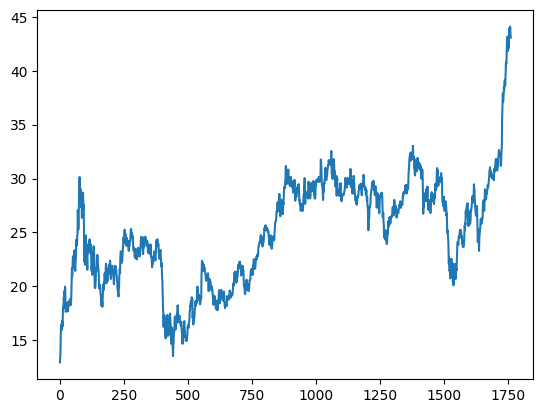

In [64]:
#отрисовка графика с помощью pyplot
plt.plot(df.open)
#отрисовка графика с помощью plotly
fig = px.line(df.open, labels={'x':'idx', 'y':'value'})
fig.show()

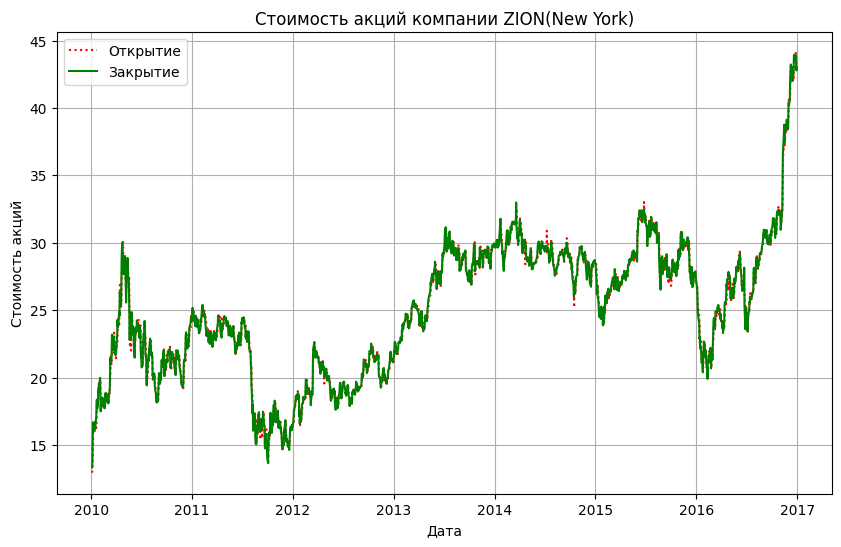

In [66]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
#Преобразование колонки в формат datetime
df['date']= pd.to_datetime(df['date'])

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df.date, df.open.values, color='red', linestyle = 'dotted')

ax.set(xlabel="Дата", ylabel="Cтоимость акций",
       title="Стоимость акций компании ZION(New York)")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y"))


ax.plot(df.date, df.close.values, color='green', linestyle = 'solid')

ax.set(xlabel="Дата", ylabel="Cтоимость акций",
       title="Стоимость акций компании ZION(New York)")

ax.legend(['Открытие', 'Закрытие'])

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y"))
ax.xaxis.grid(which = 'both')
ax.yaxis.grid(which = 'both')
plt.show()

In [67]:

fig = go.Figure()

fig.add_trace(go.Scatter(x = df['date'],
                    y = df['close'],
                    line = dict(color = 'green', width = 2),
                    name = 'Закрытие'))

fig.add_trace(go.Scatter(x=df['date'],
                    y=df['open'],
                    name='Открытие',
                    line=dict(color='red', width=2,
                            dash='dash')))

fig.update_layout(title='Стоимость акций компании ZION(New York)',
                    xaxis_title='Дата',
                    yaxis_title='Цена')
fig.show()

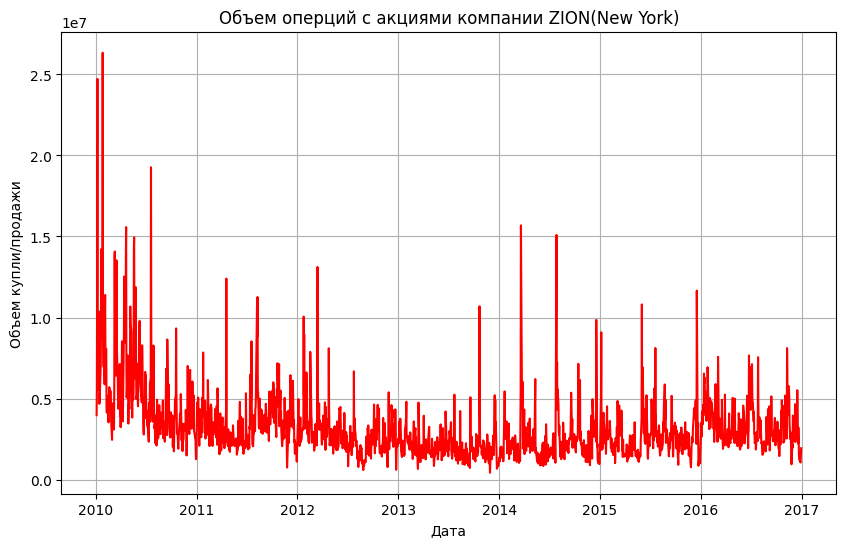

In [70]:

df['date']= pd.to_datetime(df['date'])

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df.date, df.volume.values, color='red', linestyle = 'solid')

ax.set(xlabel="Дата", ylabel="Объем купли/продажи",
       title="Объем оперций с акциями компании ZION(New York)")

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

ax.xaxis.grid(which = 'both')
ax.yaxis.grid(which = 'both')
plt.show()

In [71]:

fig = go.Figure()

fig.add_trace(go.Scatter(x=df['date'],
                    y=df['volume'],
                    line=dict(color='green', width=2)))

fig.update_layout(title='Объем оперций с акциями компании ZION(New York)',
                    xaxis_title='Дата',
                    yaxis_title='Объем купли/продажи')
fig.show()

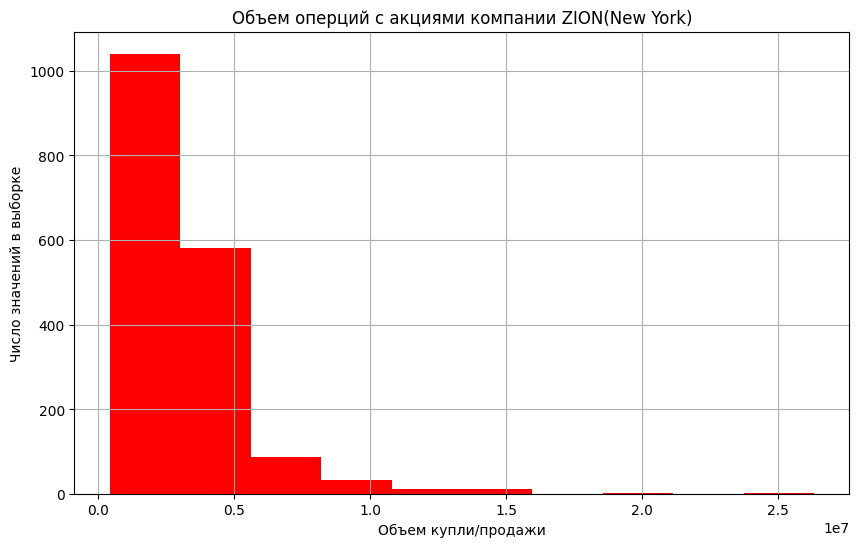

In [72]:

fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(df.volume.values, color='red', linestyle = 'solid')

ax.set(xlabel="Объем купли/продажи", ylabel="Число значений в выборке",
       title="Объем оперций с акциями компании ZION(New York)")

# ax.xaxis.set_major_locator(mdates.YearLocator())
# ax.xaxis.set_major_formatter(DateFormatter("%Y"))

ax.xaxis.grid(which = 'both')
ax.yaxis.grid(which = 'both')
plt.show()

In [73]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=df['volume'],
              xbins=go.histogram.XBins(size=3*10**6)))

fig.update_layout(title='Объем оперций с акциями компании ZION(New York)',
                    xaxis_title='Дата',
                    yaxis_title='Объем купли/продажи')
fig.show()

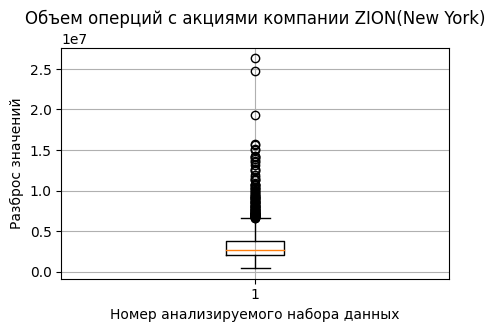

In [75]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.boxplot(df.volume.values)

ax.set(xlabel="Номер анализируемого набора данных", ylabel="Разброс значений",
       title="Объем оперций с акциями компании ZION(New York)")

ax.xaxis.grid(which = 'both')
ax.yaxis.grid(which = 'both')
plt.show()

In [77]:
fig = go.Figure()

fig.add_trace(go.Box(y=df['volume'], name = '1'))

fig.update_layout(title='Объем оперций с акциями компании ZION(New York)',
                    xaxis_title='Номер анализируемого набора данных',
                    yaxis_title='Разброс значений')
fig.show()

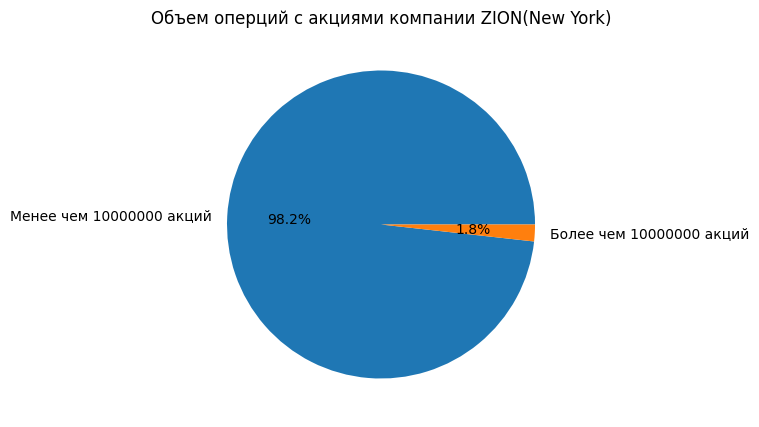

In [78]:
def func(pct):
  return "{:1.1f}%".format(pct)

fig, ax = plt.subplots(figsize=(10, 5))

ax.pie([len(df.volume[df.volume<10000000]), len(df.volume[df.volume>=10000000])],
       labels=["Менее чем 10000000 акций", "Более чем 10000000 акций"],
       autopct = lambda pct: func(pct))
ax.set(title="Объем оперций с акциями компании ZION(New York)")

plt.show()

In [79]:
fig = go.Figure()

fig.add_trace(go.Pie(values = [len(df.volume[df.volume<10000000]), len(df.volume[df.volume>=10000000])],
              labels = ["Менее чем 10000000 акций", "Более чем 10000000 акций"]))

fig.update_layout(title='Объем оперций с акциями компании ZION(New York)')
fig.show()

1. Выбрать датасет - дополнительный +
    - минимум 10 колонок
    - 10 000 строк
    - небольшая статистика по датасету (посмотреть pandas) +
2. Построить граифики с помощью plotly, matplotlib.
    - график: 2 линии, сетка, подписи осей, легенда, опрятное представление
    - гистограмма сетка, подписи осей
    - круговая диаграмма
    - boxplot
3. Дополнительные способы визуализации +